## 1 Set theory

From the lecture we already know $\mathrm{P}(A \cup B)=\mathrm{P}(A)+\mathrm{P}(B)-\mathrm{P}(A\cap B)$. With this it follows:

$\begin{aligned} & \mathrm{P}(A \cup B \cup C) \\ = & \mathrm{P}(A \cup(B \cup C)) \\ = & \mathrm{P}(A)+\mathrm{P}(B \cup C)-\mathrm{P}(A \cap(B \cup C)) \\ = & \mathrm{P}(A)+\mathrm{P}(B)+\mathrm{P}(C)-\mathrm{P}(B \cap C)-\mathrm{P}(A \cap(B \cup C)) \hspace{6cm} |\text{use distributivity}  \\ = & \mathrm{P}(A)+\mathrm{P}(B)+\mathrm{P}(C)-\mathrm{P}(B \cap C)-\mathrm{P}((A \cap B) \cup(A \cap C)) \\ = & \mathrm{P}(A)+\mathrm{P}(B)+\mathrm{P}(C)-\mathrm{P}(B \cap C)-\mathrm{P}(A \cap B)-\mathrm{P}(A \cap C)+\mathrm{P}((A \cap B) \cap(A \cap C)) \\ = & \mathrm{P}(A)+\mathrm{P}(B)+\mathrm{P}(C)-\mathrm{P}(B \cap C)-\mathrm{P}(A \cap B)-\mathrm{P}(A \cap C)+\mathrm{P}(A \cap B \cap C)\end{aligned}$

## 4 Coding exercise: Coupon collector’s problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.special import zeta
from scipy.stats import norm
import random
from math import factorial
import mpmath as mp

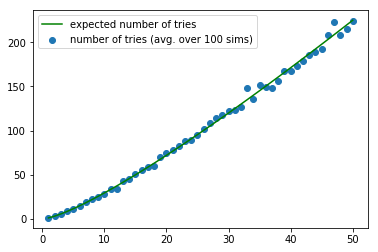

In [2]:
N=np.linspace(1,50,50)

def tries(N,runs):
    results=[]
    for i in range(runs):
        coupons = 0
        N_tries = 0
        while coupons < N:
            N_tries += 1
            r = np.random.uniform(0,1,1)
            if r < (N - coupons)/N:
                coupons += 1
        results.append(N_tries)         
    return results

def avg_tries(N,runs):
    return np.mean(tries(N,runs))

simulations=[]
for i in N:
    simulations.append(avg_tries(i,100))    
    
def expected(N):
    t=0
    for i in range(N):
        i=int(i)
        t+=1/(i+1)      
    return t*N

exp_values=[]
for i in N:
    exp_values.append(expected(int(i)))
        
plt.scatter(N,simulations,label="number of tries (avg. over 100 sims)")
plt.plot(N,exp_values, label="expected number of tries",color="g")
plt.legend()